<a href="https://colab.research.google.com/github/MRobalinho/Steel_statistics_folium_maps/blob/master/Steel_production_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Printing Statistics from Production and Market Steel

Using python to plot production and sales statistics about steel and iron

In [1]:
# Import packages
import os
import sys
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [84]:
# Readind (upload) Files
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Geo_country1.xls to Geo_country1.xls
User uploaded file "Geo_country1.xls" with length 28160 bytes


In [4]:
# Install packages to excel files

!pip install xlrd

    100% |████████████████████████████████| 112kB 2.4MB/s 


In [0]:
# Reading Excel files using Pandas
import pandas as pd
import xlrd
import numpy as np

In [0]:
# Set excel files to read
file_1 = 'Uses_of_Steel.xls'
file_2 = 'Brazil_Steel_Production.xls'
file_3 = 'Latin_America_Production.xls'
file_4 = 'World_Production.xls'
file_5 = 'Geo_country1.xls'


In [9]:
# Reading Pandas - Uses of Steel
df_1 = pd.read_excel(file_1)
df_1.head(10)

,THE USES OF STEEL,%
0,Buildings and infrastructure,51
1,Automotive,12
2,Metal products,11
3,Mechanical equipment,15
4,Other transport,5
5,Domestic appliances,3
6,Electrical equipment,3


In [10]:
# Reading Pandas - Brazil Steel Production and Sales
df_2 = pd.read_excel(file_2)
df_2.head()

,BRAZIL STEEL PRODUCTION -Unit:10 3 t,2018-Production,2017-Production,2016-Production,2015-Production,2014-Production,2018-sales internal market,2017-sales internal market,2016-sales internal market,2015-sales internal market,2014-sales internal market,2018-Brazil Exports,2017-Brazil Exports,2016-Brazil Exports,2015-Brazil Exports,2014-Brazil Exports
0,Flat laminates,11902.0,13687.0,12273.0,13388.3,14228.7,9171.0,9942.0,9401.0,9780.1,11856.1,2034.0,3405.0,3087.0,3493.5,2119.7
1,Long laminates,7627.0,8730.0,8647.0,9241.0,10687.7,5974.0,6635.0,6812.0,8064.6,9443.5,1510.0,1863.0,167.0,1348.3,1212.1
2,Semi-finished plates,7345.0,8624.0,7895.0,8012.8,6508.3,100.0,140.0,180.0,261.6,250.5,7154.0,NaN,NaN,8716.6,6295.1
3,Semi-finished ingots blocks and billet,787.0,1218.0,1392.0,1122.2,494.5,131.0,185.0,132.0,99.5,158.2,694.0,NaN,NaN,NaN,NaN
4,Iron and pig iron (Integrated Plants),23673.0,23471.0,26129.0,27803.4,27016.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Reading Pandas - Latin America Steel Production
df_3 = pd.read_excel(file_3)
df_3.head(20)

,COUNTRY,2018-Production,2017-Production
0,BRAZIL,26094,25455
1,MEXICO,15553,15001
2,ARGENTINA,3903,3361
3,PERU,910,887
4,COLOMBIA,892,949
5,CHILE,836,856
6,ECUADOR,442,425
7,VENEZUELA,116,354
8,CENTRAL AMERICA,295,289
9,CUBA,162,159


In [30]:
# Reading Pandas - WORLD Steel Production by Region
df_4 = pd.read_excel(file_4)
df_4.head()

,REGION,2018,2017,2016,2015,2014
0,China,699424,764802,723290,738380,754990
1,European Union,128025,154916,149253,154482,156845
2,Japan,78615,95941,96062,96564,101667
3,C.I.S (Ex. Soviet Union),76285,93828,93419,92883,97273
4,USA,64170,74949,72000,73138,80964


In [86]:
# Reading Pandas - WORLD Steel Production by Region
df_5 = pd.read_excel(file_5)
df_5.head()

,COUNTRY,Latitude,Longitude
0,BRAZIL,-15.780100,-47.929200
1,MEXICO,18.581686,-89.329159
2,ARGENTINA,-34.996496,-64.967282
3,PERU,-6.869970,-75.045851
4,COLOMBIA,2.889443,-73.783892


In [0]:
# https://matplotlib.org/examples/color/named_colors.html
# List of colors
color_list = ['red', 'tomato', 'lightsalmon', 'magenta','deepskyblue','palegreen',
'plum','cyan', 'darkorange','wheat','seashell',
'linen','aliceblue','azure','mintcream', 'oldlace',
'floralwhite','honeydew','cornsilk','lightyellow','whitesmoke',
'lavender','lightcyan','white','ghostwhite','snow',
'oldlace','oldlace','oldlace','oldlace']

# Steel Uses

In [0]:
x_1 =df_1.copy()
x_1=x_1.rename(columns = {'%':'Percentage'})
x_1=x_1.rename(columns = {'THE USES OF STEEL':'STEEL_USES'})

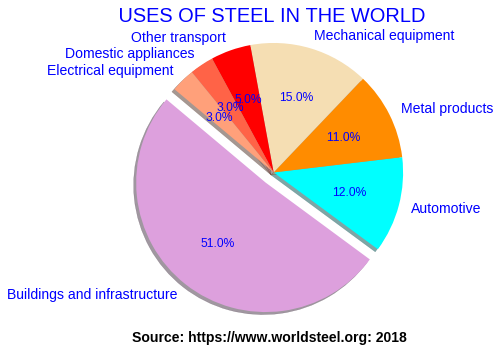

In [24]:
import matplotlib.pyplot as plt

import matplotlib as mp

# Configuring Plot
"""
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16
"""
mp.rcParams['text.color'] = 'b'
mp.rcParams['lines.linewidth'] = 2
mp.rcParams['xtick.labelsize'] = 14
mp.rcParams['axes.titlesize'] = 24
 
# Data to plot
labels = x_1.STEEL_USES
sizes  = x_1.Percentage
colors = [color_list[6], color_list[7], color_list[8], color_list[9],color_list[0],color_list[1],color_list[2]]
explode = (0.1, 0, 0, 0, 0, 0,0)  # explode 1st slice
 
# Plot
ax = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

labelfont = {'size':'14', 'color':'black', 'weight':'bold'}
plt.xlabel('Source: https://www.worldsteel.org: 2018',**labelfont)
plt.title(' USES OF STEEL IN THE WORLD',fontsize=20)
plt.axis('equal')
plt.show()

## Steel Production By Region

In [60]:
# Production By Region - Sort by Year 2018
x_2 = df_4.copy()
x_2 = pd.DataFrame(x_2)
# Rename columns by column name
#x_2 = x_2.rename(columns = {'2018':'YEAR_2018'})

# Rename columns by index
x_2 = x_2.rename(columns={x_2.columns[1]: 'YEAR_2018'})
x_2 = x_2.rename(columns={x_2.columns[2]: 'YEAR_2017'})
x_2 = x_2.rename(columns={x_2.columns[3]: 'YEAR_2016'})
x_2 = x_2.rename(columns={x_2.columns[4]: 'YEAR_2015'})
x_2 = x_2.rename(columns={x_2.columns[5]: 'YEAR_2014'})
x_2

,REGION,YEAR_2018,YEAR_2017,YEAR_2016,YEAR_2015,YEAR_2014
0,China,699424,764802,723290,738380,754990
1,European Union,128025,154916,149253,154482,156845
2,Japan,78615,95941,96062,96564,101667
3,C.I.S (Ex. Soviet Union),76285,93828,93419,92883,97273
4,USA,64170,74949,72000,73138,80964
5,OTHERS,300724,351574,323008,315956,321410


In [63]:
x_21 = pd.DataFrame(x_2)
#x_21 = x_21.sort_values(['YEAR_2018'], ascending=[0])

x_21  = x_21.sort_values(by=['YEAR_2018'], ascending=[False])
x_21

,REGION,YEAR_2018,YEAR_2017,YEAR_2016,YEAR_2015,YEAR_2014
0,China,699424,764802,723290,738380,754990
5,OTHERS,300724,351574,323008,315956,321410
1,European Union,128025,154916,149253,154482,156845
2,Japan,78615,95941,96062,96564,101667
3,C.I.S (Ex. Soviet Union),76285,93828,93419,92883,97273
4,USA,64170,74949,72000,73138,80964


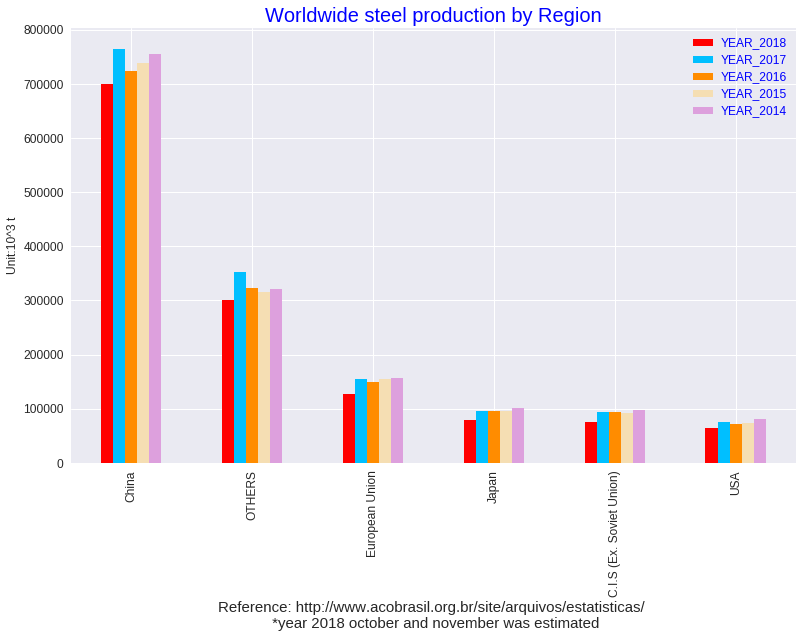

In [64]:
# Plot bar grahic with multi columns

data_plot = x_21

ax = data_plot.plot(x='REGION',
                      kind='bar',
                      figsize=(13,8),
                      grid=True,
                      color=(color_list[0], color_list[4],color_list[8],color_list[9],color_list[6]), # One for each column
                      fontsize=12)

plt.title('Worldwide steel production by Region',fontsize=20)
plt.xlabel('Reference: http://www.acobrasil.org.br/site/arquivos/estatisticas/ \n *year 2018 october and november was estimated',fontsize=15)
plt.ylabel('Unit:10^3 t',fontsize=12)
# Setup size to legend
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.show()

## World Steel Production

In [65]:
# Create a line with total by columns

df_4x  = df_4.copy()

# Sum the columns:
sum_row = {col: df_4x[col].sum() for col in df_4x}
# Turn the sums into a DataFrame with one row with an index of 'Total':
sum_df = pd.DataFrame(sum_row, index=["Total"])
# Now append the row:
df_4x = df_4x.append(sum_df)
df_4x

,REGION,2018,2017,2016,2015,2014
0,China,699424,764802,723290,738380,754990
1,European Union,128025,154916,149253,154482,156845
2,Japan,78615,95941,96062,96564,101667
3,C.I.S (Ex. Soviet Union),76285,93828,93419,92883,97273
4,USA,64170,74949,72000,73138,80964
5,OTHERS,300724,351574,323008,315956,321410
Total,ChinaEuropean UnionJapanC.I.S (Ex. Soviet Unio...,1347243,1536010,1457032,1471403,1513149


In [66]:
# Another way to obtain a sum of all columns
df_4x  = df_4.copy()
df_xy = df_4x.append(pd.Series(df_4x.sum(),name='Total'))
df_xy

,REGION,2018,2017,2016,2015,2014
0,China,699424,764802,723290,738380,754990
1,European Union,128025,154916,149253,154482,156845
2,Japan,78615,95941,96062,96564,101667
3,C.I.S (Ex. Soviet Union),76285,93828,93419,92883,97273
4,USA,64170,74949,72000,73138,80964
5,OTHERS,300724,351574,323008,315956,321410
Total,ChinaEuropean UnionJapanC.I.S (Ex. Soviet Unio...,1347243,1536010,1457032,1471403,1513149


In [67]:
# Filter by Total line
List = ['Total']
df_xy1 = df_xy.loc[List]     # select line by index = Total
df_xy1.REGION = 'YEARS'
df_xy1

,REGION,2018,2017,2016,2015,2014
Total,YEARS,1347243,1536010,1457032,1471403,1513149


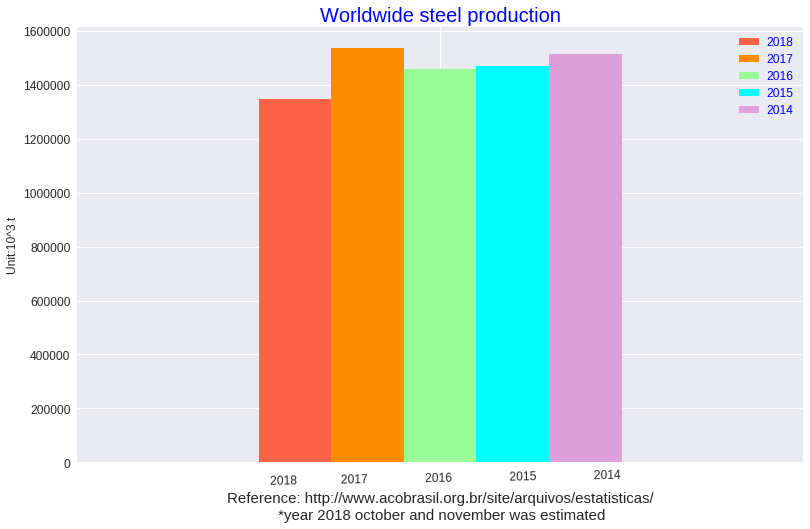

In [68]:
data_plot =df_xy1

x = [ '   2018             2017                 2016                 2015                 2014']

ax = data_plot.plot(  x='REGION',
                      kind='bar',
                      figsize=(13,8),
                      grid=True,
                      rot= 1,
                      color=(color_list[1], color_list[8],color_list[5],color_list[7],color_list[6]), # One for each column
                      fontsize=12)

plt.title('Worldwide steel production',fontsize=20)
plt.xlabel('Reference: http://www.acobrasil.org.br/site/arquivos/estatisticas/\n *year 2018 october and november was estimated',fontsize=15)
plt.ylabel('Unit:10^3 t',fontsize=12)
ax.set_xticklabels(x)

# Setup size to legend
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.show()

## Latin America Production

In [71]:
df_3x = df_3.copy()

# Rename columns
df_3x=df_3x.rename(columns = {'2018-Production':'2018_Production'})
df_3x=df_3x.rename(columns = {'2017-Production':'2017_Production'})
df_3x.head(20)

,COUNTRY,2018_Production,2017_Production
0,BRAZIL,26094,25455
1,MEXICO,15553,15001
2,ARGENTINA,3903,3361
3,PERU,910,887
4,COLOMBIA,892,949
5,CHILE,836,856
6,ECUADOR,442,425
7,VENEZUELA,116,354
8,CENTRAL AMERICA,295,289
9,CUBA,162,159


In [72]:
df_3x = df_3x.sort_values(by=['2018_Production'], ascending=[False])
df_3x

,COUNTRY,2018_Production,2017_Production
0,BRAZIL,26094,25455
1,MEXICO,15553,15001
2,ARGENTINA,3903,3361
3,PERU,910,887
4,COLOMBIA,892,949
5,CHILE,836,856
6,ECUADOR,442,425
8,CENTRAL AMERICA,295,289
9,CUBA,162,159
7,VENEZUELA,116,354


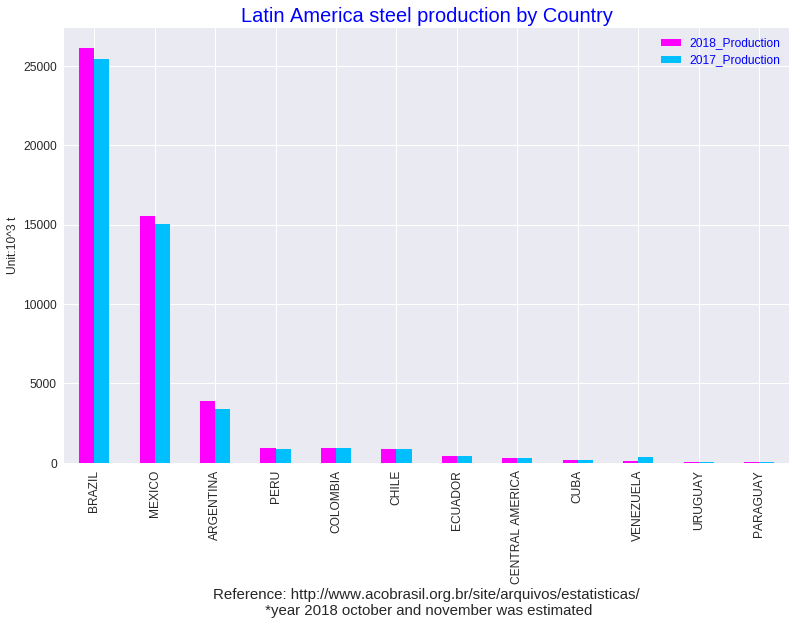

In [73]:
# Plot bar grahic with multi columns
data_plot = df_3x

ax = data_plot.plot(  x='COUNTRY',
                      kind='bar',
                      figsize=(13,8),
                      grid=True,
                      color=(color_list[3], color_list[4],color_list[8],color_list[9],color_list[6]), # One for each column
                      fontsize=12)
plt.title('Latin America steel production by Country',fontsize=20)
plt.xlabel('Reference: http://www.acobrasil.org.br/site/arquivos/estatisticas/\n *year 2018 october and november was estimated',fontsize=15)
plt.ylabel('Unit:10^3 t',fontsize=12)
# Setup size to legend
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.show()

## Creating Maps with Folium package

In [74]:
# Installing Maps
!pip install folium

    100% |████████████████████████████████| 92kB 3.4MB/s 


In [103]:
df_5x = df_5.copy()
 
# Concatenate 2 DataFrames
#df_map = pd.concat([df_3x, df_5x],axis=1)

# Merge 2 dataframes
df_map = pd.merge(df_3x, df_5x, on = 'COUNTRY', how = 'inner')
df_map

,COUNTRY,2018_Production,2017_Production,Latitude,Longitude
0,BRAZIL,26094,25455,-15.780100,-47.929200
1,MEXICO,15553,15001,18.581686,-89.329159
2,ARGENTINA,3903,3361,-34.996496,-64.967282
3,PERU,910,887,-6.869970,-75.045851
4,COLOMBIA,892,949,2.889443,-73.783892
5,CHILE,836,856,-31.761336,-71.318770
6,ECUADOR,442,425,-1.339767,-79.366697
7,CENTRAL AMERICA,295,289,-39.109821,-67.091794
8,CUBA,162,159,23.013134,-80.832875
9,VENEZUELA,116,354,8.001871,-66.110932


In [128]:
# Create colun with tooltip to write in the map
df_map['tooltip'] = df_map['COUNTRY'] + '  : Steel production =' + df_map['2018_Production'].map(str)
df_map

,COUNTRY,2018_Production,2017_Production,Latitude,Longitude,tooltip
0,BRAZIL,26094,25455,-15.780100,-47.929200,BRAZIL : Steel production =26094
1,MEXICO,15553,15001,18.581686,-89.329159,MEXICO : Steel production =15553
2,ARGENTINA,3903,3361,-34.996496,-64.967282,ARGENTINA : Steel production =3903
3,PERU,910,887,-6.869970,-75.045851,PERU : Steel production =910
4,COLOMBIA,892,949,2.889443,-73.783892,COLOMBIA : Steel production =892
5,CHILE,836,856,-31.761336,-71.318770,CHILE : Steel production =836
6,ECUADOR,442,425,-1.339767,-79.366697,ECUADOR : Steel production =442
7,CENTRAL AMERICA,295,289,-39.109821,-67.091794,CENTRAL AMERICA : Steel production =295
8,CUBA,162,159,23.013134,-80.832875,CUBA : Steel production =162
9,VENEZUELA,116,354,8.001871,-66.110932,VENEZUELA : Steel production =116


In [0]:
# Making a map using the folium module
import folium

In [76]:
countries = [
    {'loc': [-15.7801,  -47.9292],        'label': 'BRASIL-Steel Production 2018: 26.094 (10^3 t)'},
    {'loc': [18.581686, -89.329159],      'label': 'MEXICO-Steel Production 2018: 15.553 (10^3 t)'},
    {'loc': [-34.9964963,  -64.9672817],  'label': 'ARGENTINA-Steel Production 2018: 3.903 (10^3 t)'},
    {'loc': [-6.8699697,  -75.0458515],   'label': 'PERU-Steel Production 2018: 910 (10^3 t)'},
    {'loc': [2.8894434,  -73.783892],     'label': 'COLOMBIA-Steel Production 2018: 892 (10^3 t)'},
    {'loc': [-31.7613365,  -71.3187697],  'label': 'CHILE-Steel Production 2018: 836 (10^3 t)'},   
    {'loc': [23.0131338, -80.8328748],    'label': 'CUBA-Steel Production 2018: 162 (10^3 t)'},   
    {'loc': [39.7837304, -100.4458825],   'label': 'USA-Steel Production 2018: 64.170 (10^3 t)'}, 
    {'loc': [46.603354, 1.8883335],       'label': 'EUROPE-Steel Production 2018: 128.025 (10^3 t)'},    
    {'loc': [35.000074, 104.999927],      'label': 'CHINA-Steel Production 2018: 699.424 (10^3 t)'},
    {'loc': [64.6863136, 97.7453061],     'label': 'RUSSIA-Steel Production 2018: 76.285 (10^3 t)'},
    {'loc': [36.5748441, 139.2394179],    'label': 'JAPAN-Steel Production 2018: 78.615 (10^3 t)'},
    {'loc': [8.0018709, -66.1109318],     'label': 'VENEZUELA-Steel Production 2018: 116 (10^3 t)'},    
    ]

countries

[{'label': 'BRASIL-Steel Production 2018: 26.094 (10^3 t)',
  'loc': [-15.7801, -47.9292]},
 {'label': 'MEXICO-Steel Production 2018: 15.553 (10^3 t)',
  'loc': [18.581686, -89.329159]},
 {'label': 'ARGENTINA-Steel Production 2018: 3.903 (10^3 t)',
  'loc': [-34.9964963, -64.9672817]},
 {'label': 'PERU-Steel Production 2018: 910 (10^3 t)',
  'loc': [-6.8699697, -75.0458515]},
 {'label': 'COLOMBIA-Steel Production 2018: 892 (10^3 t)',
  'loc': [2.8894434, -73.783892]},
 {'label': 'CHILE-Steel Production 2018: 836 (10^3 t)',
  'loc': [-31.7613365, -71.3187697]},
 {'label': 'CUBA-Steel Production 2018: 162 (10^3 t)',
  'loc': [23.0131338, -80.8328748]},
 {'label': 'USA-Steel Production 2018: 64.170 (10^3 t)',
  'loc': [39.7837304, -100.4458825]},
 {'label': 'EUROPE-Steel Production 2018: 128.025 (10^3 t)',
  'loc': [46.603354, 1.8883335]},
 {'label': 'CHINA-Steel Production 2018: 699.424 (10^3 t)',
  'loc': [35.000074, 104.999927]},
 {'label': 'RUSSIA-Steel Production 2018: 76.285 (10^3 t

In [136]:
# https://www.coordenadas-gps.com/mapa/pais/MX

steel_map = folium.Map(tiles='Stamen Terrain',
                       location=[-15.7801,  -47.9292],
                       zoom_start= 3)

tooltip = 'Click me!'

# Adding markers to the map using Dict
for country in countries:
    marker = folium.Marker(location=country['loc'], popup=country['label'],  tooltip=tooltip)
    marker.add_to(steel_map)


# print map 
steel_map

In [130]:
# https://www.coordenadas-gps.com/mapa/pais/MX
# https://medium.com/@bobhaffner/folium-markerclusters-and-fastmarkerclusters-1e03b01cb7b1

steel_map = folium.Map(tiles='Stamen Terrain',
                       location=[-15.7801,  -47.9292],
                       zoom_start= 3)

tooltip = 'Click me!'
# Adding markers to the map using DataFrame
for row in df_map.itertuples():
    steel_map.add_child(folium.Marker(location=[row.Latitude ,row.Longitude],
           popup=row.tooltip))

# Adding markers to the map using Dict
#for country in countries:
#    marker = folium.Marker(location=country['loc'], popup=country['label'],  tooltip=tooltip)
#    marker.add_to(steel_map)


# print map 
steel_map

In [135]:
# https://www.coordenadas-gps.com/mapa/pais/MX
# https://medium.com/@bobhaffner/folium-markerclusters-and-fastmarkerclusters-1e03b01cb7b1

from folium.plugins import MarkerCluster

steel_map = folium.Map(tiles='Stamen Terrain',
                       location=[-15.7801,  -47.9292],
                       zoom_start= 3)

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
tooltip = 'Click me!'
mc = MarkerCluster()

# Adding markers to the map using DataFrame
for row in df_map.itertuples():
    mc.add_child(folium.Marker(location=[row.Latitude ,row.Longitude],
           popup=row.tooltip))
    
steel_map.add_child(mc)
# print map 
steel_map

## Steel Products from Brazil

In [138]:
df_2.head()

,BRAZIL STEEL PRODUCTION -Unit:10 3 t,2018-Production,2017-Production,2016-Production,2015-Production,2014-Production,2018-sales internal market,2017-sales internal market,2016-sales internal market,2015-sales internal market,2014-sales internal market,2018-Brazil Exports,2017-Brazil Exports,2016-Brazil Exports,2015-Brazil Exports,2014-Brazil Exports
0,Flat laminates,11902.0,13687.0,12273.0,13388.3,14228.7,9171.0,9942.0,9401.0,9780.1,11856.1,2034.0,3405.0,3087.0,3493.5,2119.7
1,Long laminates,7627.0,8730.0,8647.0,9241.0,10687.7,5974.0,6635.0,6812.0,8064.6,9443.5,1510.0,1863.0,167.0,1348.3,1212.1
2,Semi-finished plates,7345.0,8624.0,7895.0,8012.8,6508.3,100.0,140.0,180.0,261.6,250.5,7154.0,NaN,NaN,8716.6,6295.1
3,Semi-finished ingots blocks and billet,787.0,1218.0,1392.0,1122.2,494.5,131.0,185.0,132.0,99.5,158.2,694.0,NaN,NaN,NaN,NaN
4,Iron and pig iron (Integrated Plants),23673.0,23471.0,26129.0,27803.4,27016.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df_2x = df_2.copy()
# Rename columns by index
df_2x = df_2x.rename(columns={df_2x.columns[0]: 'PRODUCTS'})
df_2x.head()

,PRODUCTS,2018-Production,2017-Production,2016-Production,2015-Production,2014-Production,2018-sales internal market,2017-sales internal market,2016-sales internal market,2015-sales internal market,2014-sales internal market,2018-Brazil Exports,2017-Brazil Exports,2016-Brazil Exports,2015-Brazil Exports,2014-Brazil Exports
0,Flat laminates,11902.0,13687.0,12273.0,13388.3,14228.7,9171.0,9942.0,9401.0,9780.1,11856.1,2034.0,3405.0,3087.0,3493.5,2119.7
1,Long laminates,7627.0,8730.0,8647.0,9241.0,10687.7,5974.0,6635.0,6812.0,8064.6,9443.5,1510.0,1863.0,167.0,1348.3,1212.1
2,Semi-finished plates,7345.0,8624.0,7895.0,8012.8,6508.3,100.0,140.0,180.0,261.6,250.5,7154.0,NaN,NaN,8716.6,6295.1
3,Semi-finished ingots blocks and billet,787.0,1218.0,1392.0,1122.2,494.5,131.0,185.0,132.0,99.5,158.2,694.0,NaN,NaN,NaN,NaN
4,Iron and pig iron (Integrated Plants),23673.0,23471.0,26129.0,27803.4,27016.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# Create a sub DataFrame
sub_2 = df_2x[['PRODUCTS','2018-Production','2018-sales internal market','2018-Brazil Exports']]
sub_2

,PRODUCTS,2018-Production,2018-sales internal market,2018-Brazil Exports
0,Flat laminates,11902.0,9171.0,2034.0
1,Long laminates,7627.0,5974.0,1510.0
2,Semi-finished plates,7345.0,100.0,7154.0
3,Semi-finished ingots blocks and billet,787.0,131.0,694.0
4,Iron and pig iron (Integrated Plants),23673.0,NaN,NaN
5,Transformed,NaN,NaN,NaN


In [153]:
# Fill NaN by zeros
sub_2 = sub_2.fillna(0)
sub_2

,PRODUCTS,2018-Production,2018-sales internal market,2018-Brazil Exports
0,Flat laminates,11902.0,9171.0,2034.0
1,Long laminates,7627.0,5974.0,1510.0
2,Semi-finished plates,7345.0,100.0,7154.0
3,Semi-finished ingots blocks and billet,787.0,131.0,694.0
4,Iron and pig iron (Integrated Plants),23673.0,0.0,0.0
5,Transformed,0.0,0.0,0.0


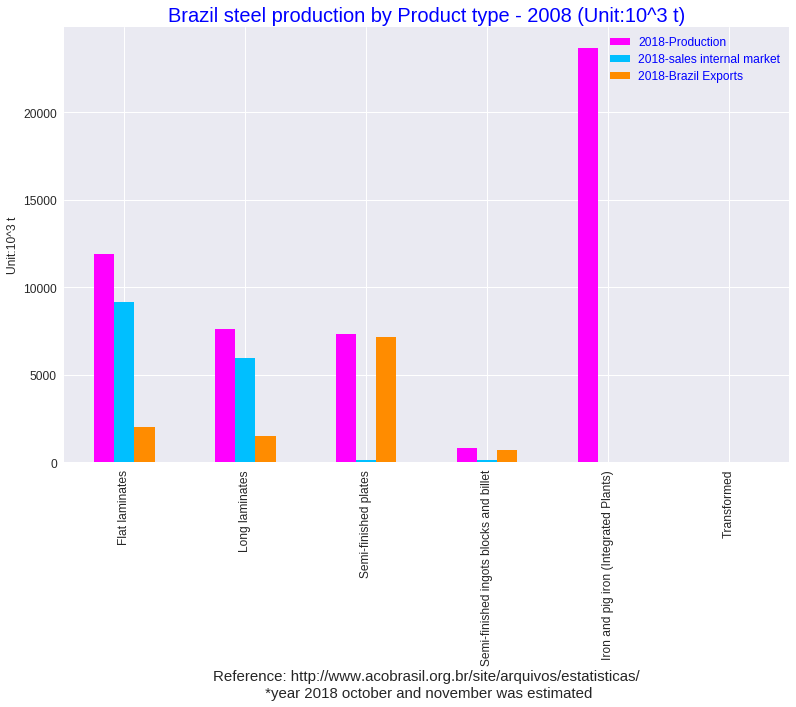

In [155]:
# Plot bar grahic with multi columns
data_plot = sub_2

ax = data_plot.plot(  x=data_plot.PRODUCTS,
                      kind='bar',
                      figsize=(13,8),
                      grid=True,
                      color=(color_list[3], color_list[4],color_list[8],color_list[9],color_list[6]), # One for each column
                      fontsize=12)
plt.title('Brazil steel production by Product type - 2008 (Unit:10^3 t)',fontsize=20)
plt.xlabel('Reference: http://www.acobrasil.org.br/site/arquivos/estatisticas/\n *year 2018 october and november was estimated',fontsize=15)
plt.ylabel('Unit:10^3 t',fontsize=12)
# Setup size to legend
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
# Create a sub DataFrameplt.show()

In [156]:
# Create a sub DataFrame
sub_3 = df_2x[['PRODUCTS','2018-Production','2017-Production','2016-Production','2015-Production','2014-Production']]
sub_3

,PRODUCTS,2018-Production,2017-Production,2016-Production,2015-Production,2014-Production
0,Flat laminates,11902.0,13687.0,12273.0,13388.3,14228.7
1,Long laminates,7627.0,8730.0,8647.0,9241.0,10687.7
2,Semi-finished plates,7345.0,8624.0,7895.0,8012.8,6508.3
3,Semi-finished ingots blocks and billet,787.0,1218.0,1392.0,1122.2,494.5
4,Iron and pig iron (Integrated Plants),23673.0,23471.0,26129.0,27803.4,27016.3
5,Transformed,NaN,NaN,NaN,NaN,NaN


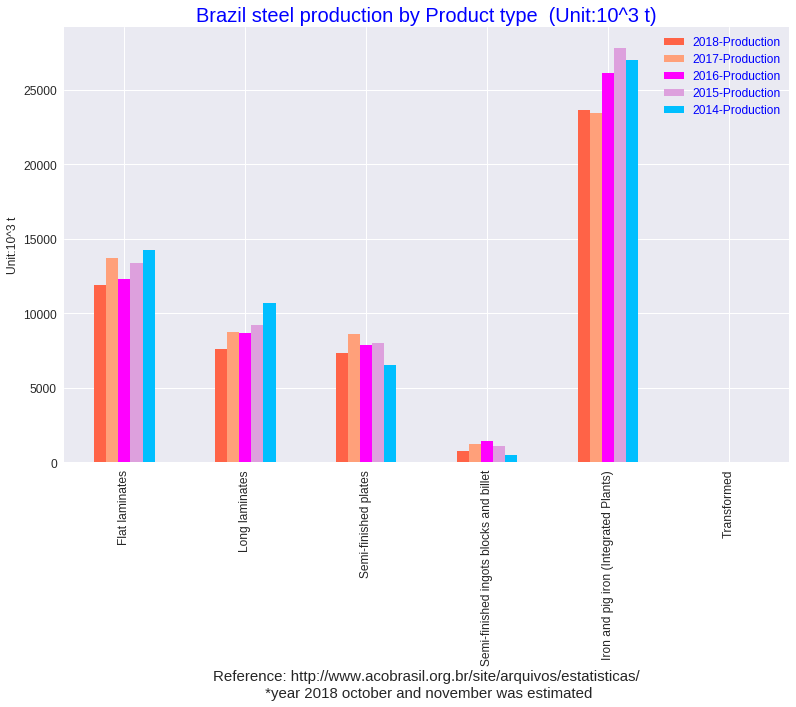

In [162]:
# Plot bar grahic with multi columns
data_plot = sub_3

ax = data_plot.plot(  x=data_plot.PRODUCTS,
                      kind='bar',
                      figsize=(13,8),
                      grid=True,
                      color=(color_list[1], color_list[2],color_list[3],color_list[6],color_list[4]), # One for each column
                      fontsize=12)
plt.title('Brazil steel production by Product type  (Unit:10^3 t)',fontsize=20)
plt.xlabel('Reference: http://www.acobrasil.org.br/site/arquivos/estatisticas/\n *year 2018 october and november was estimated',fontsize=15)
plt.ylabel('Unit:10^3 t',fontsize=12)
# Setup size to legend
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.show()

In [163]:
# Create a sub DataFrame
sub_4 = df_2x[['PRODUCTS','2018-sales internal market','2017-sales internal market','2016-sales internal market','2015-sales internal market','2014-sales internal market',
              '2018-Brazil Exports','2017-Brazil Exports','2016-Brazil Exports','2015-Brazil Exports','2014-Brazil Exports']]
sub_4

,PRODUCTS,2018-sales internal market,2017-sales internal market,2016-sales internal market,2015-sales internal market,2014-sales internal market,2018-Brazil Exports,2017-Brazil Exports,2016-Brazil Exports,2015-Brazil Exports,2014-Brazil Exports
0,Flat laminates,9171.0,9942.0,9401.0,9780.1,11856.1,2034.0,3405.0,3087.0,3493.5,2119.7
1,Long laminates,5974.0,6635.0,6812.0,8064.6,9443.5,1510.0,1863.0,167.0,1348.3,1212.1
2,Semi-finished plates,100.0,140.0,180.0,261.6,250.5,7154.0,NaN,NaN,8716.6,6295.1
3,Semi-finished ingots blocks and billet,131.0,185.0,132.0,99.5,158.2,694.0,NaN,NaN,NaN,NaN
4,Iron and pig iron (Integrated Plants),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Transformed,NaN,NaN,NaN,NaN,NaN,NaN,327.0,193.0,167.4,154.1


In [164]:
# Fill NaN by zeros
sub_4 = sub_4.fillna(0)
sub_4

,PRODUCTS,2018-sales internal market,2017-sales internal market,2016-sales internal market,2015-sales internal market,2014-sales internal market,2018-Brazil Exports,2017-Brazil Exports,2016-Brazil Exports,2015-Brazil Exports,2014-Brazil Exports
0,Flat laminates,9171.0,9942.0,9401.0,9780.1,11856.1,2034.0,3405.0,3087.0,3493.5,2119.7
1,Long laminates,5974.0,6635.0,6812.0,8064.6,9443.5,1510.0,1863.0,167.0,1348.3,1212.1
2,Semi-finished plates,100.0,140.0,180.0,261.6,250.5,7154.0,0.0,0.0,8716.6,6295.1
3,Semi-finished ingots blocks and billet,131.0,185.0,132.0,99.5,158.2,694.0,0.0,0.0,0.0,0.0
4,Iron and pig iron (Integrated Plants),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Transformed,0.0,0.0,0.0,0.0,0.0,0.0,327.0,193.0,167.4,154.1


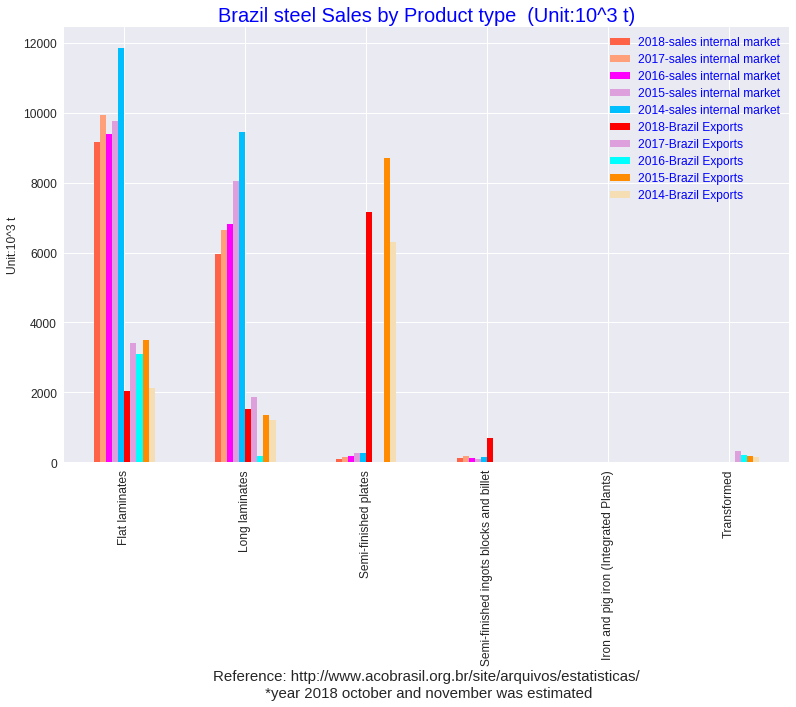

In [174]:
# Plot bar grahic with multi columns
data_plot = sub_4

ax = data_plot.plot(  x=data_plot.PRODUCTS,
                      kind='bar',
                      figsize=(13,8),
                      grid=True,
                      color=(color_list[1], color_list[2],color_list[3],color_list[6],color_list[4],color_list[0],
                             color_list[6], color_list[7],color_list[8],color_list[9],color_list[10],color_list[11]), # One for each column
                      fontsize=12)
plt.title('Brazil steel Sales by Product type  (Unit:10^3 t)',fontsize=20)
plt.xlabel('Reference: http://www.acobrasil.org.br/site/arquivos/estatisticas/\n *year 2018 october and november was estimated',fontsize=15)
plt.ylabel('Unit:10^3 t',fontsize=12)
# Setup size to legend
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.show()